# Trabajo Regresion de H lines del Dataset Datasaurus.
Por: Christian Buestan

El siguiente trabajo tiene como objetivo aplicar 3 tipos de regresiones a los datos etiquetados como h_lines del dataset Datasaurus. Por lo que es necesario cargar el dataset y extraer solo los datos del grupo h_lines.

## Carga del dataset

Se carga el dataset en base datasaurus.csv, pero tambien se agrupa el conjunto h_lines del mismo en un dataset local, esto con la finalidad de trabajar en solo ese dataset.

In [17]:
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import numpy as np
import pandas as pd

# Cargar los datos del Datasaurus

data = pd.read_csv('datasaurus.csv', sep = ',')
dataset=data.groupby(by=["dataset"]).get_group("h_lines")

print(dataset.shape)
dataset.head(10)


(142, 3)


,dataset,x,y
284,h_lines,53.366567,90.208030
285,h_lines,52.801979,90.088065
286,h_lines,47.054130,90.458936
287,h_lines,42.448434,89.507700
288,h_lines,42.704036,90.442629
289,h_lines,32.378939,90.144143
290,h_lines,32.530703,70.157397
291,h_lines,33.365264,70.459335
292,h_lines,32.656099,70.051070
293,h_lines,22.955093,70.426895


Si bien se cargo exitosamente, aun se debe visualizar la grafica de los datos, esto por medio de la libreria Matplotlib. Con ello solo es seleccionar los datos respectivos y revisar si el conjunto especificado es el  correcto.

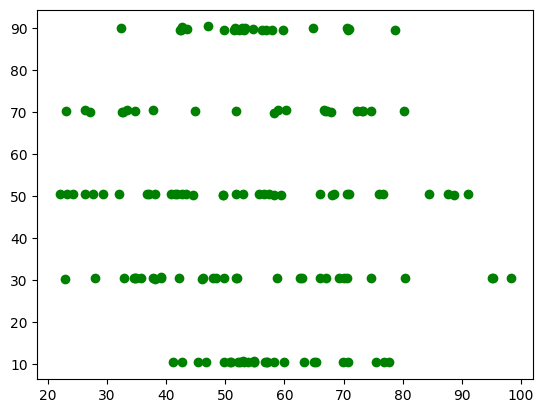

In [21]:
#Extraigo las variables X e Y, sabiendo que todo ya pertenece a la grafic h_lines
dataset = dataset[["x","y"]]
plt.scatter(x=dataset['x'],y=dataset['y'],c="green")
plt.show()

Mi trabajo es realizar una regresion lineal para comprobar si mi respuesta de graficar una linea central en la grafica fue o no acertada.

Grafica con mi linea en base a la vista de los datos

![Practica 1 Problema de regresion linear de h lines Datasaurus..PNG](<attachment:Practica 1 Problema de regresion linear de h lines Datasaurus..PNG>)
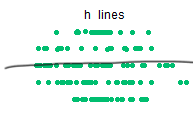

# Aplicar Regresión lineal al conjunto de datos.


Uso la libreria Scikitlearn de modelo linear com su importacion de Regresssion Linear para ajustar el modelo, eso y mis datos extraidos de X e Y solo debo de calcular el coeficiente de regresion en base a un entrenamiento de mi modelo en base a los datos en X e Y.
Despues de tener mi modelo entrenado y los datos graficare una linea con matplot de color rojo en base a la predicccion de mi modelo en X.

Coeficiente: [-0.09916499]
Intercepto: 53.21108723889212


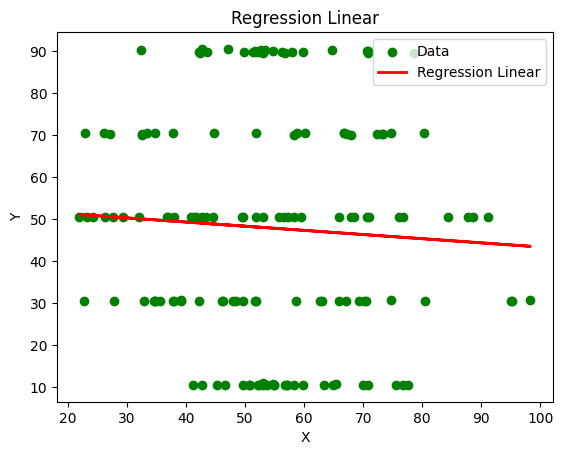

In [25]:
from sklearn.linear_model import LinearRegression

# Asegúrate de tener solo las columnas 'X' e 'Y' en tu conjunto de datos
X = dataset[['x']]
y = dataset['y']

# Inicializar y ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Imprimir los coeficientes de la regresión
print("Coeficiente:", model.coef_)
print("Intercepto:", model.intercept_)

# Graficar los datos originales en puntos
plt.scatter(X, y, color='green', label='Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regression Linear')

# Graficar la línea de regresión
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression Linear')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

Con esto puedo decir que mi aproximacion de la respuesta fue muy acertada, con esto puedo seguir trabajando con regresiones Cuadratica y Polinomica de mi conjunto de datos H_lines.

# Aplicar Regression cuadratica al conjunto de datos.

Nuevamente con Scikit learn voy a usar el PolynomialFeatures que me permiticra una regresion cuadratica en base a los grados que yo ingrese, en este caso como es una Regresion cuadratica, usare degree=2. Con ello primero creare un polinomio  a entrenar en base a los datos en X. Luego de eso con una regresion linear entrenare un modelo en base al polinomio creado junto con el conjunto de datos en Y.

Coeficiente: [ 0.         -0.14872721  0.0004402 ]
Intercepto: 54.481440646455574


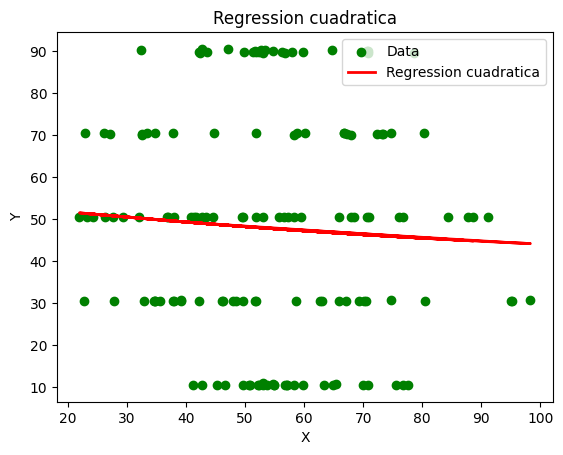

In [27]:
from sklearn.preprocessing import PolynomialFeatures

# Asegúrate de tener solo las columnas 'X' e 'Y' en tu conjunto de datos
X = dataset[['x']]
y = dataset['y']

# Ajustar un modelo de regresión cuadrática 2 grados
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

# Imprimir los coeficientes de la regresión
print("Coeficiente:", model.coef_)
print("Intercepto:", model.intercept_)

# Graficar los datos originales en puntos
plt.scatter(X, y, color='green', label='Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regression cuadratica')

# Graficar la línea de regresión
plt.plot(X, model.predict(X_poly), color='red', linewidth=2, label='Regression cuadratica')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

Como se puede visualizar, siguen estando acorde los datos con mi prediccion hecha, por ende es correcto mi analisis visual de prediccion linear.

# Aplicar Regression Polinomial al conjunto de datos

Similar al anterior, solo que aqui el polinomio es de 4 grados, el proceso siendo el mismo, entrenar el polinomio en base a X y el modelo igualmente entrenado en base a este polinomio y el conjunto de datos en Y. Graficado con matplot esta prediccion se visualizara un resultado algo indescriptible.

Coeficiente: [ 0.00000000e+00  4.49817431e+00 -1.61244643e-01  2.24829169e-03
 -1.07296421e-05]
Intercepto: 10.421546713751795


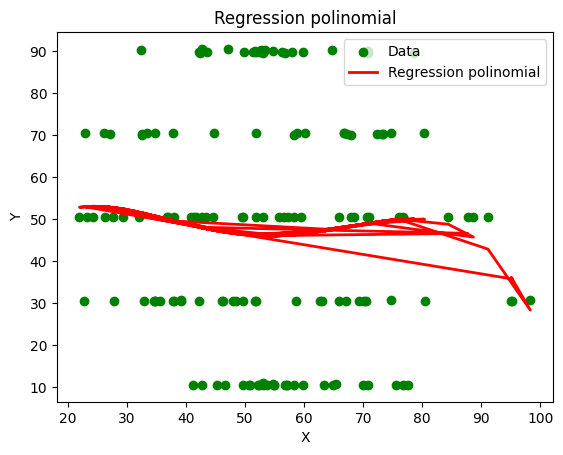

In [36]:
from sklearn.preprocessing import PolynomialFeatures

# Asegúrate de tener solo las columnas 'X' e 'Y' en tu conjunto de datos
X = dataset[['x']]
y = dataset['y']

# Ajustar un modelo de regresión polinomial 4 grados
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

# Imprimir los coeficientes de la regresión
print("Coeficiente:", model.coef_)
print("Intercepto:", model.intercept_)

# Graficar los datos originales en puntos
plt.scatter(X, y, color='green', label='Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regression polinomial')

# Graficar la línea de regresión
plt.plot(X, model.predict(X_poly), color='red', linewidth=2, label='Regression polinomial')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

Esta prediccion es mas inestable, probablemente debido a el grado de polinomio, pero igual sigue con la misma logica, siendo talvez el menos oportuno para probar el punto de mi prediccion visual de la regresion linear.

Con esto ha concluido el trabajo de regresion linear, siendo un buen ejercicio para demostrar el criterio humano al momento de predecir una linea de los datos dentro del conjunto visualizado. 

Gracias por su visualizacion.

Referencias

https://www.kaggle.com/code/tombutton/datasaurus-dozen/input

https://www.geeksforgeeks.org/python-pandas-dataframe-groupby/
https://matplotlib.org/stable/gallery/shapes_and_collections/scatter.html#sphx-glr-gallery-shapes-and-collections-scatter-py

https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

